In [1]:
import numpy as np
import tensorflow as tf

# tf.config.list_physical_devices('GPU')

for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu,True)
# Avoid OOM error


True

In [2]:
import cv2
import imghdr


Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
bcrypt                        3.2.0
beautiful

In [3]:
dataset = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [7]:
dataset = dataset.map(lambda x,y: (x/255,y))

In [23]:
train_size = int(len(dataset)*.7)
val_size = int( len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [21]:
train = dataset.take(train_size)
val= dataset.skip(train_size).take(val_size)
test =dataset.skip(train_size+val_size).take(test_size)

In [24]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [27]:
model = Sequential()
# Seqential Model for single in and out


In [28]:
#Block 1
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
#Block 1
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
#Block 3
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [31]:
logdir= 'logs'

In [32]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
pred = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 28s 1s/step - loss: 1.0212 - accuracy: 0.5134 - val_loss: 0.6876 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 9s 987ms/step - loss: 0.6686 - accuracy: 0.5223 - val_loss: 0.6784 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 9s 987ms/step - loss: 0.6137 - accuracy: 0.7098 - val_loss: 0.6707 - val_accuracy: 0.5312
Epoch 4/20
7/7 [==============================] - 8s 926ms/step - loss: 0.5692 - accuracy: 0.7143 - val_loss: 0.3770 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.4445 - accuracy: 0.8036 - val_loss: 0.4324 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 9s 925ms/step - loss: 0.3429 - accuracy: 0.8884 - val_loss: 0.2367 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 9s 982ms/step - loss: 0.2332 - accuracy: 0.9196 - val_loss: 0.1732 - val_accuracy: 0.9844
Epoch 8/20
7/7 [========

In [34]:
from matplotlib import pyplot as plt

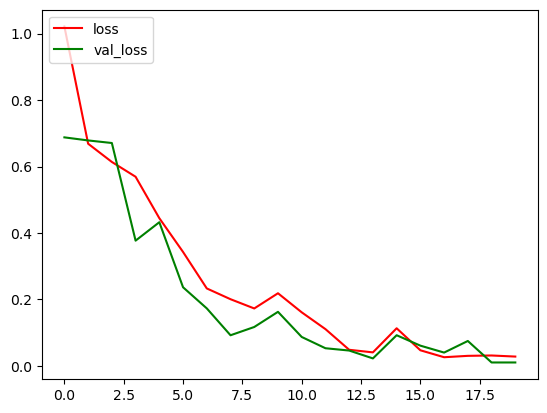

In [36]:
fig = plt.figure
plt.plot(pred.history['loss'],color='red',label='loss')
plt.plot(pred.history['val_loss'],color='green',label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [37]:
from keras.metrics import Precision,Recall,BinaryAccuracy

In [39]:
dataset_enum = dataset.as_numpy_iterator()
batch = dataset_enum.next()

In [38]:
prec = Precision()
rec =Recall()
acc = BinaryAccuracy()

In [41]:
for bat in  test.as_numpy_iterator():
    x,y = bat
    y_hat = model.predict(x)
    prec.update_state(y,y_hat)
    rec.update_state(y,y_hat)
    acc.update_state(y,y_hat)


1/1 [==============================] - 0s 425ms/step


In [42]:
print(prec.result(),rec.result(),acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


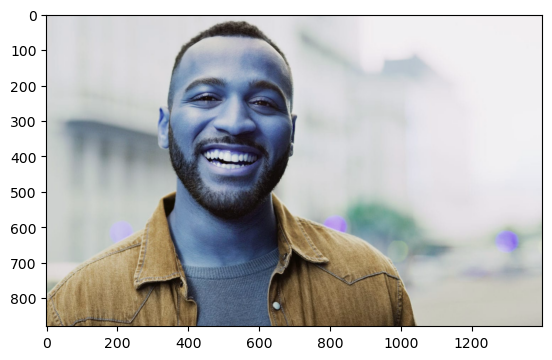

In [62]:
import cv2
image = cv2.imread('05-12-21-happy-people.jpg')
plt.imshow(image)
plt.show()

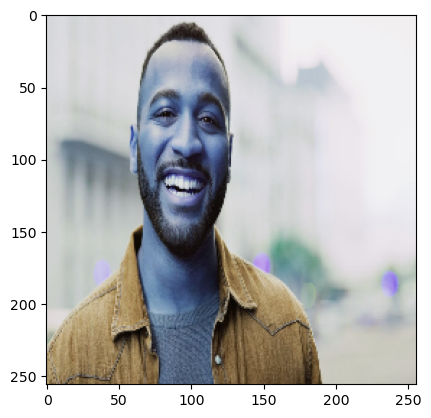

In [63]:
resize = tf.image.resize(image,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
import numpy as np
y_hat  = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 23ms/step


In [66]:
if y_hat > 0.5:
    print("Class: Sad")
else:
    print("Class: Happy")

Class: Happy


In [67]:
from keras.models import load_model
import os
model.save(os.path.join('models','HappySadClassifier.h5'))